top 5 maiores expotadores dos últimos 5 anos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_export = pd.read_csv('dataset_export_soybean.csv')[['state','kg','date']]
df_export = df_export.sort_values(by=['date']).reset_index(drop=True)
df_export['date'] = pd.to_datetime(df_export['date'])
df_export['Mes'] = df_export['date'].apply(lambda x: str(x.year)+str(x.month).zfill(2))
df_export

,state,kg,date,Mes
0,MG,5600,2015-01-01,201501
1,SP,24000,2015-01-01,201501
2,SC,11240420,2015-01-01,201501
3,MG,23300250,2015-01-01,201501
4,PR,50459580,2015-01-01,201501
...,...,...,...,...
7992,MT,301588,2020-04-01,202004
7993,MS,69414197,2020-04-01,202004
7994,SP,598949,2020-04-01,202004
7995,MT,7286021,2020-04-01,202004


In [2]:
df = df_export.groupby(['state','Mes'])['kg'].sum().reset_index()
df

,state,Mes,kg
0,AC,201805,5800
1,AC,201904,1288792
2,AC,201905,148198
3,AC,202003,800030
4,AC,202004,1842401
...,...,...,...
1034,TO,201912,67799943
1035,TO,202001,18921732
1036,TO,202002,6768817
1037,TO,202003,358257079


In [3]:
df_grouped = df_export.groupby(['state'])['kg'].sum().reset_index()
df_grouped = df_grouped.sort_values(by=['kg'], ascending=False).reset_index(drop=True)
df_grouped = df_grouped.head(n=8)
df_grouped

,state,kg
0,MT,97990749419
1,RS,59307458195
2,PR,53634386683
3,GO,24853004861
4,MS,20008722488
5,SP,19340418415
6,MG,15854294935
7,BA,14949019685


In [80]:
estados = df_grouped['state'].to_list()

In [86]:
estados_full = set(df['state'].to_list())

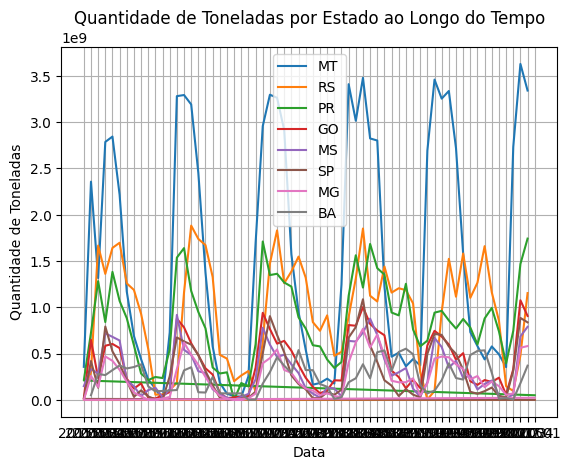

In [81]:
for estado in estados:
    data = df[df['state'] == estado]
    plt.plot(data['Mes'], data['kg'], label=estado)

plt.xlabel('Data')
plt.ylabel('Quantidade de Toneladas')
plt.title('Quantidade de Toneladas por Estado ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

Preciptação de chuva

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

df_rain = pd.read_csv('dataset_precipitation_soybean.csv')[['state','date','precipitation']]
df_rain['date'] = pd.to_datetime(df_rain['date'])
df_rain['Mes'] = df_rain['date'].apply(lambda x: str(x.year)+str(x.month).zfill(2))
df_rain = df_rain.loc[df_rain['Mes'].isin(df['Mes'])]

df_rain

,state,date,precipitation,Mes
204,BA,2015-01-31,"51,3",201501
205,BA,2015-02-28,"89,6",201502
206,BA,2015-03-31,"31,3",201503
207,BA,2015-04-30,"394,2",201504
208,BA,2015-05-31,639,201505
...,...,...,...,...
5809,SC,2017-07-31,"9,4",201707
5810,SC,2017-08-31,"116,3",201708
5811,SC,2017-09-30,"104,1",201709
5812,SC,2017-10-31,100,201710


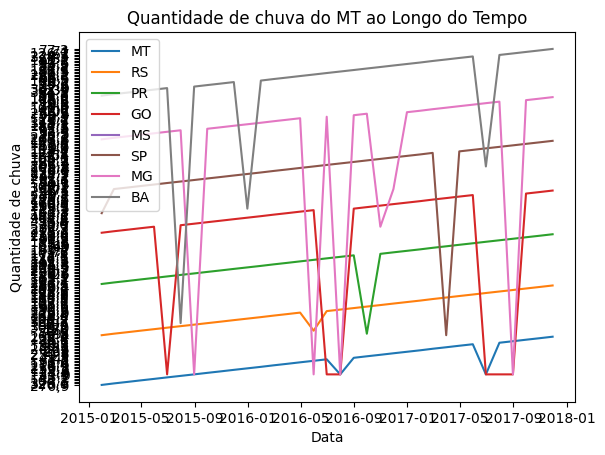

In [163]:
for estado in estados:
    data = df_rain[df_rain['state'] == estado]
    plt.plot(data['date'], data['precipitation'], label = estado)

plt.xlabel('Data')
plt.ylabel('Quantidade de chuva')
plt.title('Quantidade de chuva do MT ao Longo do Tempo')
plt.legend()
plt.show()

Comparando a relação entre a preciptação de chuva e quantidade de toneladas exportadas

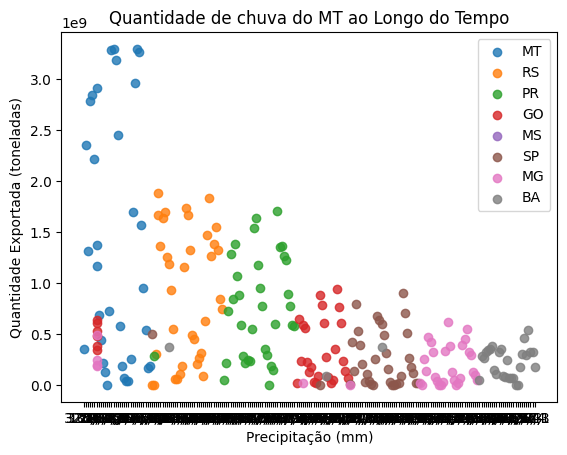

In [87]:
for estado in estados:
    data1 = df[df['state'] == estado]
    data2 = df_rain[df_rain['state'] == estado]

    data2 = data2.loc[data2['Mes'].isin(data1['Mes'].to_list())]
    data1 = data1.loc[data1['Mes'].isin(data2['Mes'].to_list())]

    plt.scatter(data2['precipitation'], data1['kg'], label=estado, alpha=0.8)

plt.xlabel("Precipitação (mm)")
plt.ylabel("Quantidade Exportada (toneladas)")
plt.title('Quantidade de chuva do MT ao Longo do Tempo')
plt.legend()
plt.show()

Temperatura

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

df_temperature = pd.read_csv('temperature_brazil.csv')[['TempBulboSeco','TempBulboUmido','TempMaxima','TempMinima','UmidadeRelativa','date']]

df_temperature['TempBulboSeco'] = df_temperature['TempBulboSeco'].str.replace(',', '.').astype(float)
df_temperature['TempBulboUmido'] = df_temperature['TempBulboUmido'].str.replace(',', '.').astype(float)
df_temperature['TempMaxima'] = df_temperature['TempMaxima'].str.replace(',', '.').astype(float)
df_temperature['TempMinima'] = df_temperature['TempMinima'].str.replace(',', '.').astype(float)
df_temperature['UmidadeRelativa'] = df_temperature['UmidadeRelativa'].astype(int)

df_temperature['Temperature'] = (df_temperature['TempBulboSeco'] + df_temperature['TempBulboUmido']) / 2
df_temperature = df_temperature[['Temperature','TempMaxima','TempMinima','UmidadeRelativa','date']]

df_temperature['date'] = pd.to_datetime(df_temperature['date'])
df_temperature['Mes'] = df_temperature['date'].apply(lambda x: str(x.year)+str(x.month).zfill(2))

df_temperature

,Temperature,TempMaxima,TempMinima,UmidadeRelativa,date,Mes
0,24.95,32.3,22.9,83,1961-01-01 00:00:00,196101
1,24.95,32.3,22.9,83,1961-01-01 12:00:00,196101
2,29.65,32.3,22.9,65,1961-01-01 18:00:00,196101
3,25.20,33.2,22.9,91,1961-01-02 00:00:00,196101
4,25.40,33.2,23.7,78,1961-01-02 12:00:00,196101
...,...,...,...,...,...,...
1048570,29.00,33.5,24.2,51,2012-08-14 00:00:00,201208
1048571,26.55,33.5,24.2,66,2012-08-14 12:00:00,201208
1048572,27.10,33.5,24.2,63,2012-08-14 18:00:00,201208
1048573,27.10,36.8,24.2,63,2012-08-15 00:00:00,201208


In [108]:
df_temperature = df_temperature.groupby('Mes').mean().reset_index()
df_temperature = df_temperature.round()
df_temperature

,Mes,Temperature,TempMaxima,TempMinima,UmidadeRelativa,date
0,196101,26.0,31.0,24.0,84.0,1961-01-16 07:57:38.823529408
1,196102,25.0,31.0,23.0,85.0,1961-02-14 22:00:00.000000000
2,196103,26.0,31.0,23.0,83.0,1961-03-16 10:33:29.482758624
3,196104,26.0,31.0,23.0,84.0,1961-04-15 22:00:00.000000000
4,196105,26.0,31.0,23.0,85.0,1961-05-16 11:12:31.135135136
...,...,...,...,...,...,...
703,201908,27.0,33.0,24.0,80.0,2019-08-16 14:05:24.238410496
704,201909,27.0,34.0,24.0,77.0,2019-09-15 22:08:59.207048448
705,201910,27.0,33.0,24.0,77.0,2019-10-16 09:37:17.037037056
706,201911,27.0,33.0,24.0,78.0,2019-11-16 00:16:01.696113152


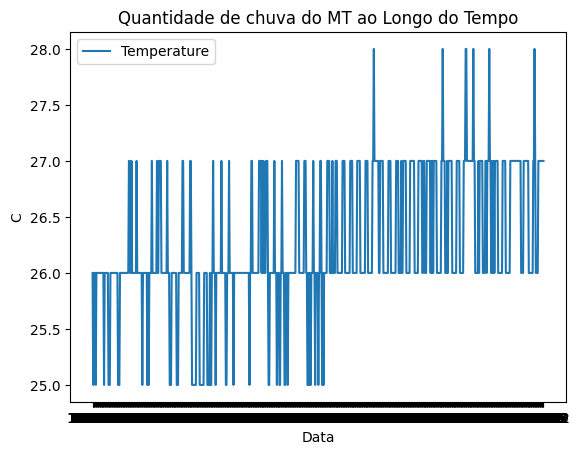

In [110]:
plt.plot(df_temperature['Mes'], df_temperature['Temperature'], label = 'Temperature')

plt.xlabel('Data')
plt.ylabel('C')
plt.title('Quantidade de chuva do MT ao Longo do Tempo')
plt.legend()
plt.show()

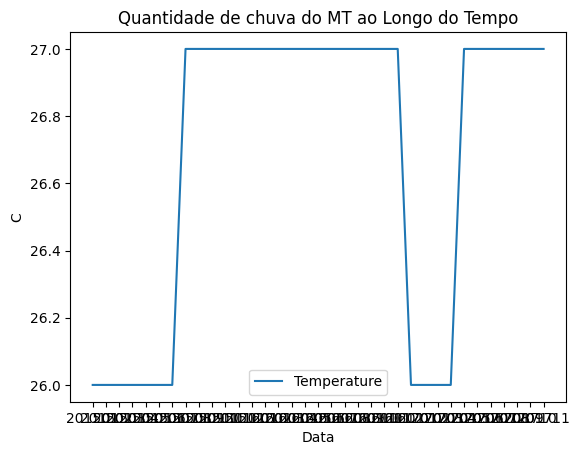

In [111]:
df_temp = df_temperature.loc[df_temperature['Mes'].isin(df_rain['Mes'].to_list())]

plt.plot(df_temp['Mes'], df_temp['Temperature'], label = 'Temperature')

plt.xlabel('Data')
plt.ylabel('C')
plt.title('Quantidade de chuva do MT ao Longo do Tempo')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


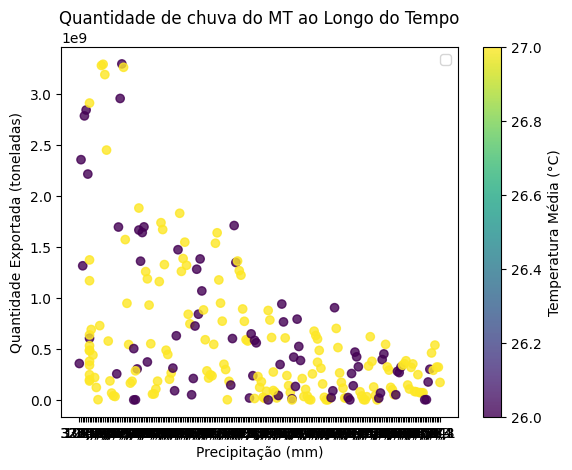

In [124]:
for estado in estados:
    data1 = df[df['state'] == estado]
    data2 = df_rain[df_rain['state'] == estado]

    data2 = data2.loc[data2['Mes'].isin(data1['Mes'].to_list())]
    data1 = data1.loc[data1['Mes'].isin(data2['Mes'].to_list())]
    df_temp = df_temperature.loc[df_temperature['Mes'].isin(data1['Mes'].to_list())]

    plt.scatter(data2['precipitation'], data1['kg'], c=df_temp['Temperature'], cmap="viridis", alpha=0.8)

plt.xlabel("Precipitação (mm)")
plt.ylabel("Quantidade Exportada (toneladas)")
plt.title('Quantidade de chuva do MT ao Longo do Tempo')
plt.legend()

colorbar = plt.colorbar()
colorbar.set_label('Temperatura Média (°C)')

plt.show()


Preço da soja de acordo com a oscilação da moeda

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_money = pd.read_csv('dataset_prices_soybean.csv')[['date','real','usd']]
df_money['date'] = pd.to_datetime(df_money['date'])
df_money['Mes'] = df_money['date'].apply(lambda x: str(x.year)+str(x.month).zfill(2))

df_money['real'] = df_money['real'].str.replace(',','.').astype(float)
df_money['usd'] = df_money['usd'].str.replace(',','.').astype(float)

# df_money = df_money.loc[df_money['Mes'].isin(df['Mes'].to_list())]
df_money = df_money.groupby('Mes').mean().reset_index()
df_money = df_money.round()

df_money

,Mes,date,real,usd
0,199707,1997-07-30 00:00:00.000000000,18.0,17.0
1,199708,1997-08-15 12:00:00.000000000,18.0,17.0
2,199709,1997-09-14 22:54:32.727272704,19.0,18.0
3,199710,1997-10-16 08:20:52.173913088,19.0,17.0
4,199711,1997-11-15 12:00:00.000000000,20.0,18.0
...,...,...,...,...
288,202107,2021-07-16 01:05:27.272727296,163.0,32.0
289,202108,2021-08-15 22:54:32.727272704,168.0,32.0
290,202109,2021-09-16 02:17:08.571428608,170.0,32.0
291,202110,2021-10-15 22:48:00.000000000,168.0,30.0


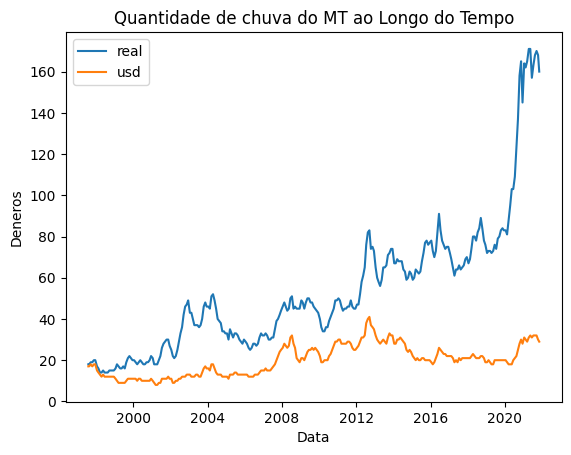

In [141]:
plt.plot(df_money['date'], df_money['real'], label = 'real')
plt.plot(df_money['date'], df_money['usd'], label = 'usd')

plt.xlabel('Data')
plt.ylabel('Deneros')
plt.title('Quantidade de chuva do MT ao Longo do Tempo')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


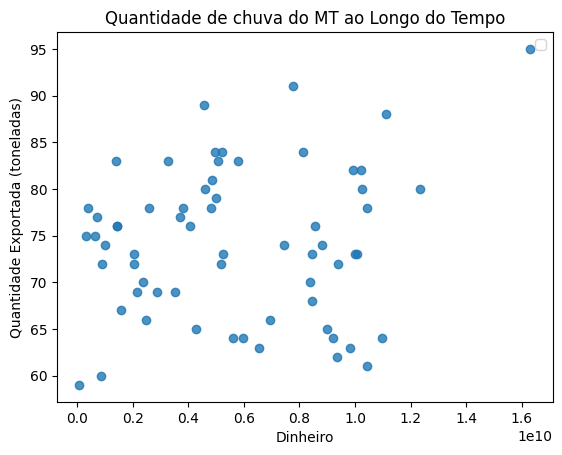

In [3]:
df_grouped = df_export.groupby(['Mes'])['kg'].sum().reset_index()

df_real = df_money.loc[df_money['Mes'].isin(df_grouped['Mes'].to_list())]

plt.scatter(df_grouped['kg'], df_real['real'], alpha=0.8)
# plt.scatter(df_grouped['kg'], df_real['usd'], alpha=0.8)

plt.xlabel("Dinheiro")
plt.ylabel("Quantidade Exportada (toneladas)")
plt.title('Quantidade de chuva do MT ao Longo do Tempo')
plt.legend()
plt.show()

In [10]:
import numpy as np

x = df_grouped["kg"].to_list()
y = df_real['real'].to_list()

correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]
correlation_coefficient

0.14673004989085908

In [7]:
df_grouped["kg"].dtypes

dtype('int64')

In [8]:
df_real['real'].dtypes

dtype('float64')

In [2]:
import pandas as pd

df_export = pd.read_csv('dataset_export_soybean.csv')[['state','kg','date']]
df_export = df_export.sort_values(by=['date']).reset_index(drop=True)
df_export['Dia'] = pd.to_datetime(df_export['date'])
df_export['Mes'] = df_export['Dia'].apply(lambda x: str(x.year)+str(x.month).zfill(2))
df_export['Ano'] = df_export['Dia'].apply(lambda x: str(x.year))
df_export = df_export.loc[~df_export['state'].isin(['RO', 'MS', 'ND'])]


df_rain = pd.read_csv('dataset_precipitation_soybean.csv')[['state','date','precipitation']]
df_rain['precipitation'] = df_rain['precipitation'].str.replace(',','.').astype(float)
df_rain['Dia'] = pd.to_datetime(df_rain['date'])
df_rain['Mes'] = df_rain['Dia'].apply(lambda x: str(x.year)+str(x.month).zfill(2))
df_rain['Ano'] = df_rain['Dia'].apply(lambda x: str(x.year))
df_rain['Dia'] = df_rain['Dia'].apply(lambda x: str(x.year)+str(x.month).zfill(2)+str('01'))
df_rain['Dia'] = pd.to_datetime(df_rain['Dia'])


In [3]:
temporal_slct = "Dia"

In [4]:
df_filtred_rain = df_rain.groupby([temporal_slct])['precipitation'].mean().round().reset_index()
df_filtred_export = df_export.groupby([temporal_slct])['kg'].sum().reset_index()

In [5]:
df_filtred_rain

,Dia,precipitation
0,1998-01-01,190.0
1,1998-02-01,154.0
2,1998-03-01,201.0
3,1998-04-01,148.0
4,1998-05-01,135.0
...,...,...
234,2017-07-01,152.0
235,2017-08-01,62.0
236,2017-09-01,74.0
237,2017-10-01,88.0
